<a href="https://colab.research.google.com/github/mayankkom-dev/NLU_Assignment3/blob/main/COMP8730_Assign03_kumar48.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup environmnet - Colab 

In [ ]:
!pip install pytrec_eval

# Downloading Dataset

In [3]:
from custom_download import download_df
df = download_df(url="https://fh295.github.io/SimLex-999.zip")
df.head(3)

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
0,old,new,A,1.58,2.72,2.81,2,7.25,1,0.41
1,smart,intelligent,A,9.20,1.75,2.46,1,7.11,1,0.67
2,hard,difficult,A,8.77,3.76,2.21,2,5.94,1,1.19


# Golden Standard

In [4]:
df.groupby('word1').get_group('apple').head(3)

,word1,word2,POS,SimLex999,conc(w1),conc(w2),concQ,Assoc(USF),SimAssoc333,SD(SimLex)
280,apple,juice,N,2.88,5.0,4.89,4,0.70,1,1.65
389,apple,candy,N,2.08,5.0,4.83,4,0.35,0,0.75
637,apple,sauce,N,1.43,5.0,4.75,4,0.14,0,2.11


In [5]:
from groupby_topN import get_topNDf, pretty_plotHist, transitivityExp
top_n_df = get_topNDf(df)
top_n_df.head(3)

Total 616 unique word for our Golden Standard


,word1,topN,topNW
0,absence,1,presence
1,absorb,3,"learn, possess, withdraw"
2,abundance,1,plenty


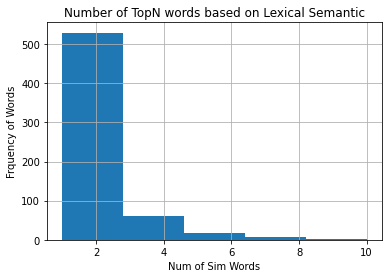

In [6]:
pretty_plotHist(top_n_df, 'topN', 5, title='Number of TopN words based on Lexical Semantic',
xlabel='Num of Sim Words', ylabel='Frquency of Words')

# Expanding Golden Standard - Trasitivity

In [7]:
# Before expansion
top_n_df[top_n_df['word1']=='learn']

,word1,topN,topNW
358,learn,2,"listen, evaluate"


In [8]:
top_n_df = transitivityExp(top_n_df, df)
# After expansion
top_n_df[top_n_df['word1']=='learn']

,word1,topN,topNW,topN_,topNW_
358,learn,2,"listen, evaluate",4,"listen, evaluate, hear, obey"


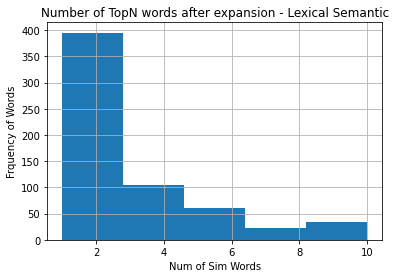

In [9]:
pretty_plotHist(top_n_df, 'topN_', 5, title='Number of TopN words after expansion - Lexical Semantic',
xlabel='Num of Sim Words', ylabel='Frquency of Words')

# Baseline - TFiDF Vectorizer - News, Romance

### Training Vectorizer

In [10]:
from tfidf_vec import fitBrown_tfidfvect, find_topN, topN_TFiDF
vectBrown_news, vectFitBrown_news  = fitBrown_tfidfvect(corpus_cat="news")
vectBrown_romance, vectFitBrown_romance  = fitBrown_tfidfvect(corpus_cat="romance")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [11]:
# find top10 using cosine similarity and the trained tfidf vectorizer
find_topN('world', vectBrown_news, vectFitBrown_news)

('free, war, series, mad, did, greatest, sure, single, coal',
 [('free', 0.7401663764137629),
  ('war', 0.6826088407452374),
  ('series', 0.6271689134895849),
  ('mad', 0.4850183223022188),
  ('did', 0.4281407864150115),
  ('greatest', 0.3853187945124261),
  ('sure', 0.3551096076423225),
  ('single', 0.32918256342375957),
  ('coal', 0.3181299040914047)])

### Generating TopN over Golden Standard

In [12]:
# Generate top10 similar word for each word in Golden Corpus within df
# using News corpus trained
import pandas as pd
pd.set_option("display.max_columns", 100)
top_n_df = topN_TFiDF(top_n_df, vectBrown_news, vectFitBrown_news, suffix='Nw')
top_n_df.tail(3)

,word1,topN,topNW,topN_,topNW_,topN-TF-Nw,topN-TF-Nw-S
613,worker,3,"employer, mechanic, camera",5,"employer, mechanic, camera, employee, president",,
614,world,1,globe,1,globe,"free, war, series, mad, did, greatest, sure, s...","[(free, 0.7401663764137629), (war, 0.682608840..."
615,yard,1,inch,1,inch,,


In [13]:
# using Romance corpus trained
top_n_df = topN_TFiDF(top_n_df, vectBrown_romance, vectFitBrown_romance, suffix='Rs')
top_n_df.tail(3)

,word1,topN,topNW,topN_,topNW_,topN-TF-Nw,topN-TF-Nw-S,topN-TF-Rs,topN-TF-Rs-S
613,worker,3,"employer, mechanic, camera",5,"employer, mechanic, camera, employee, president",,,,
614,world,1,globe,1,globe,"free, war, series, mad, did, greatest, sure, s...","[(free, 0.7401663764137629), (war, 0.682608840...","come, tough, thought, youre, damn, fashion, wo...","[(come, 0.6307550123065628), (tough, 0.6228660..."
615,yard,1,inch,1,inch,,,,


### Evaluation using average nDCG over Golden Standard

In [14]:
from tfidf_eval import get_best_vec, plot_avgnDCG

In [15]:
bestTFm, scoreBTFm = get_best_vec(top_n_df, models=['topN-TF-Nw-S', 'topN-TF-Rs-S'])
print(bestTFm, scoreBTFm)

topN-TF-Nw-S {'topN-TF-Nw-S': 0.003010672468284978, 'topN-TF-Rs-S': 0.0006001050280581845}


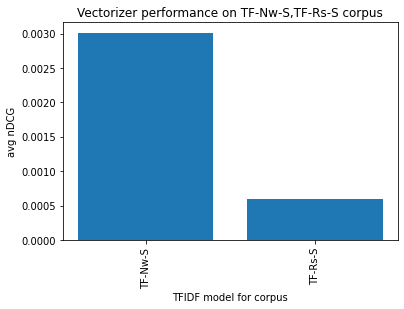

In [16]:
plot_avgnDCG(scoreBTFm)

# Baseline - Word2vec

### Training/Loading and generating Top10

In [17]:
from w2vec_vec import train_generateTopn, plotBar_dict
sent_stats, top_n_df = train_generateTopn(top_n_df, #df with golden standard 
                                          brown_cat=['news', 'romance'], # corpus to train on
                                          wins=[1, 2, 5, 10], # windows size to try
                                          vss=[10, 50, 100, 300], # emb dim to try
                                          base_model="drive/MyDrive/modelsO") # model dump and preload

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


{1: 4588, 2: 4504, 5: 4253, 10: 3759}


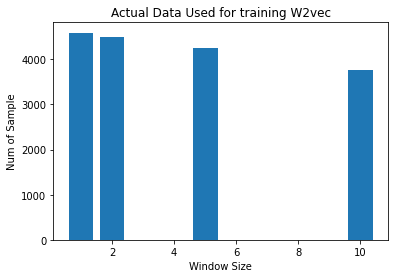

In [18]:
# Number of train record for required window size
print(sent_stats)
plotBar_dict(sent_stats, xlabel="Window Size", ylabel="Num of Sample", title="Actual Data Used for training W2vec")

In [19]:
top_n_df.tail(3)

,word1,topN,topNW,topN_,topNW_,topN-TF-Nw,topN-TF-Nw-S,topN-TF-Rs,topN-TF-Rs-S,news_1_10,news_1_10_S,news_1_50,news_1_50_S,news_1_100,news_1_100_S,news_1_300,news_1_300_S,news_2_10,news_2_10_S,news_2_50,news_2_50_S,news_2_100,news_2_100_S,news_2_300,news_2_300_S,news_5_10,news_5_10_S,news_5_50,news_5_50_S,news_5_100,news_5_100_S,news_5_300,news_5_300_S,news_10_10,news_10_10_S,news_10_50,news_10_50_S,news_10_100,news_10_100_S,news_10_300,news_10_300_S,romance_1_10,romance_1_10_S,romance_1_50,romance_1_50_S,romance_1_100,romance_1_100_S,romance_1_300,romance_1_300_S,romance_2_10,romance_2_10_S,romance_2_50,romance_2_50_S,romance_2_100,romance_2_100_S,romance_2_300,romance_2_300_S,romance_5_10,romance_5_10_S,romance_5_50,romance_5_50_S,romance_5_100,romance_5_100_S,romance_5_300,romance_5_300_S,romance_10_10,romance_10_10_S,romance_10_50,romance_10_50_S,romance_10_100,romance_10_100_S,romance_10_300,romance_10_300_S
613,worker,3,"employer, mechanic, camera",5,"employer, mechanic, camera, employee, president",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
614,world,1,globe,1,globe,"free, war, series, mad, did, greatest, sure, s...","[(free, 0.7401663764137629), (war, 0.682608840...","come, tough, thought, youre, damn, fashion, wo...","[(come, 0.6307550123065628), (tough, 0.6228660...","Salem, place, leaving, needs, thought, retired...","[(Salem, 0.8724534511566162), (place, 0.859767...","retired, ., exactly, lost, able, place, arrest...","[(retired, 0.5493535995483398), (., 0.50286048...","retired, grant, victory, ', arrested, junior, ...","[(retired, 0.3550279140472412), (grant, 0.3524...","rise, industry, troubles, new, involved, city,...","[(rise, 0.2157367765903473), (industry, 0.2026...","Salem, place, leaving, needs, thought, retired...","[(Salem, 0.8724534511566162), (place, 0.859767...","retired, ., exactly, lost, able, place, arrest...","[(retired, 0.5493535995483398), (., 0.50286048...","retired, grant, victory, ', arrested, junior, ...","[(retired, 0.3550279140472412), (grant, 0.3524...","rise, industry, troubles, new, involved, city,...","[(rise, 0.2157367765903473), (industry, 0.2026...","Salem, place, leaving, needs, thought, retired...","[(Salem, 0.8724534511566162), (place, 0.859767...","retired, ., exactly, lost, able, place, arrest...","[(retired, 0.5493535995483398), (., 0.50286048...","retired, grant, victory, ', arrested, junior, ...","[(retired, 0.3550279140472412), (grant, 0.3524...","rise, industry, troubles, new, involved, city,...","[(rise, 0.2157367765903473), (industry, 0.2026...","Salem, place, needs, thought, retired, filed, ...","[(Salem, 0.8724534511566162), (place, 0.859767...","retired, ., exactly, lost, able, place, arrest...","[(retired, 0.5493535995483398), (., 0.50286048...","retired, grant, victory, ', arrested, junior, ...","[(retired, 0.3550279140472412), (grant, 0.3524...","rise, industry, new, involved, city, attack, p...","[(rise, 0.2157367765903473), (industry, 0.2026...","sea, place, leaving, Mousie, Shafer, thought, ...","[(sea, 0.8688021898269653), (place, 0.85976701...","., exactly, thick, lost, able, handsome, place...","[(., 0.5028604865074158), (exactly, 0.46283581...","', shouted, Little, thick, ., neither, dark, p...","[(', 0.3135108947753906), (shouted, 0.29099509...","rise, new, thick, city, keeping, A-Z, circle, ...","[(rise, 0.2157367765903473), (new, 0.190629467...","sea, place, leaving, Mousie, Shafer, thought, ...","[(sea, 0.8688021898269653), (place, 0.85976701...","., exactly, thick, lost, able, handsome, place...","[(., 0.5028604865074158), (exactly, 0.46283581...","', shouted, Little, thick, ., neither, dark, p...","[(', 0.3135108947753906), (shouted, 0.29099509...","rise, new, thick, city, keeping, A-Z, circle, ...","[(rise, 0.2157367765903473), (new, 0.190629467...","sea, place, leaving, Mousie, Shafer, thought, ...","[(sea, 0.8688021898269653), (place, 0.85976701...","., exactly, thick, lost, able, handsome, place...","[(., 0.5028604865074158)

### Evaluating using avg nDCG

In [20]:
wins=[1, 2, 5, 10]
vss=[10, 50, 100, 300]
cat='news'
# all possible model for news corpus
models = [f'{cat}_{win}_{vs}_S' for win in wins for vs in vss] 
# best W2vec model with news corpus
bestNewsWvecm, scoreBNewsWvecm = get_best_vec(top_n_df, models)
print(bestNewsWvecm)

news_1_50_S


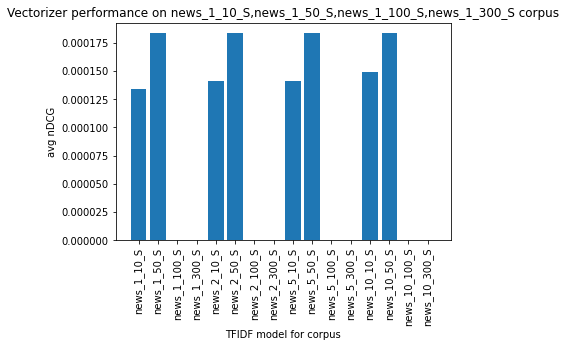

In [21]:
plot_avgnDCG(scoreBNewsWvecm)

In [22]:
wins=[1, 2, 5, 10]
vss=[10, 50, 100, 300]
cat='romance'
# all possible model for romance corpus
models=[f'{cat}_{win}_{vs}_S' for win in wins for vs in vss]
# best W2vec model with news corpus
bestRsWvecm, scoreBRsWvecm = get_best_vec(top_n_df, models)
print(bestRsWvecm)

romance_1_300_S


In [23]:
from gensim.models import Word2Vec
from w2vec_vec import topNw2vec
base_model = "/content/drive/MyDrive/modelsO"
model = Word2Vec.load(f"{base_model}/romance_w2vec_1_300.model")
topNw2vec('world', model)

('rise, new, thick, city, keeping, A-Z, circle, Evans, proved, case',
 [('rise', 0.2157367765903473),
  ('new', 0.19062946736812592),
  ('thick', 0.17405250668525696),
  ('city', 0.17155030369758606),
  ('keeping', 0.1680152863264084),
  ('A-Z', 0.1621820628643036),
  ('circle', 0.1556597203016281),
  ('Evans', 0.15071658790111542),
  ('proved', 0.1494939923286438),
  ('case', 0.14880725741386414)])

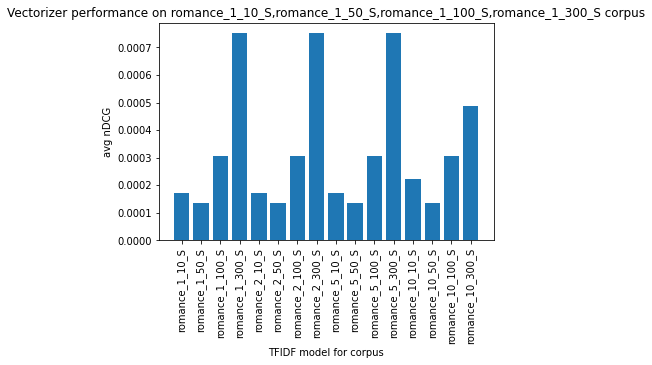

In [24]:
plot_avgnDCG(scoreBRsWvecm)

# Final Comparision Graph

In [25]:
bestNewsWvecm, scoreBNewsWvecm = get_best_vec(top_n_df, models=[bestNewsWvecm, bestRsWvecm,'topN-TF-Nw-S', 'topN-TF-Rs-S'])

In [26]:
from tfidf_eval import plot_avgnDCG

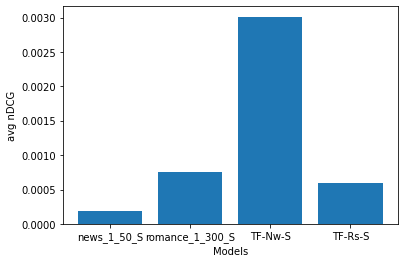

In [31]:
plot_avgnDCG(scoreBNewsWvecm)